Skipping Balkan due to missing or invalid data.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for Africa due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for Antarctica due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for Asia due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for Europa due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for NA due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for Oceania due to empty or invalid FFT result.
Data is not evenly spaced or data points are missing
Skipping inverse FFT for SA due to empty or invalid FFT result.


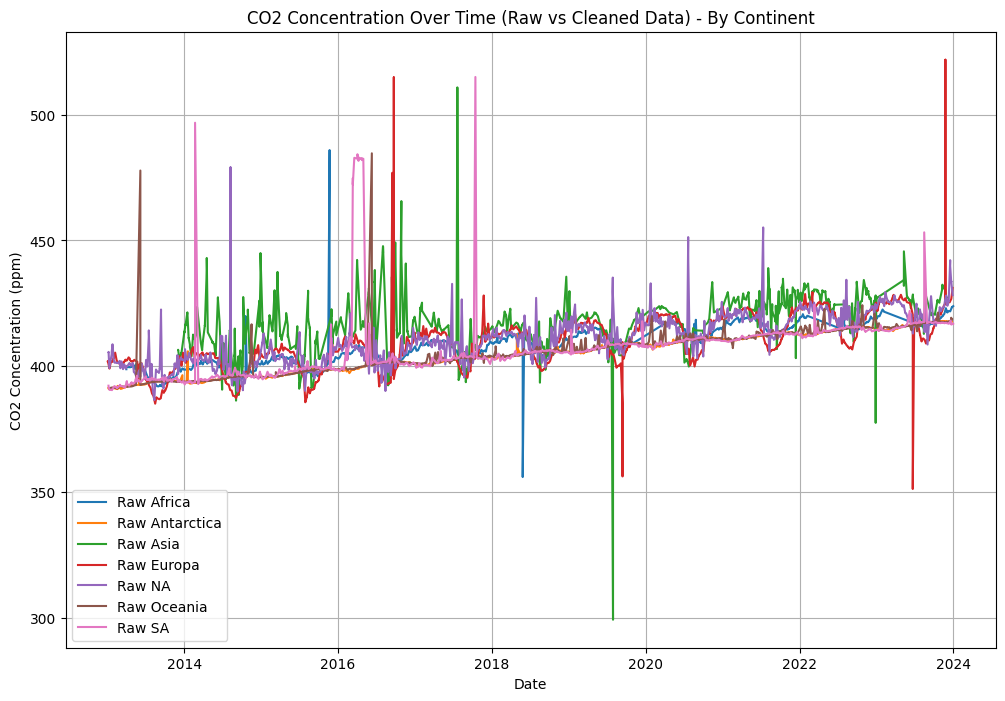

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preparation import fft_mag, inv_fft, calc_freq

# Define the path for CO2 data directory
data_dir = "CO2_International_Data"

# List of CO2 files for each continent
continents = {
    'Africa': 'Africa_Data.txt',
    'Antarctica': 'Antarctica_Data.txt',
    'Asia': 'Asia_Data.txt',
    'Balkan': 'Balkan_Data.txt',
    'Europa': 'Europa_Data.txt',
    'NA': 'NA_Data.txt',
    'Oceania': 'Oceania_Data.txt',
    'SA': 'SA_Data.txt'
}

# Function to load the CO2 data for each continent from TSV format
def load_continent_data(file_path):
    try:
        # Read the file with whitespace-separated columns
        data = pd.read_csv(file_path, sep=r'\s+')
        
        # Rename columns to remove extra spaces
        data.columns = [col.strip() for col in data.columns]
        
        # Check if 'datetime' and 'value' columns exist
        if 'datetime' in data.columns and 'value' in data.columns:
            # Parse 'datetime' to datetime format
            data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
            data.dropna(subset=['datetime'], inplace=True)  # Drop rows with invalid datetime
            
            # Set 'datetime' as the index and select the 'value' column for CO2 concentration
            data.set_index('datetime', inplace=True)
            return data['value']
        else:
            print(f"Warning: 'datetime' or 'value' column missing in {file_path}")
            return None
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except ValueError as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Load data into a dictionary for each continent
data_dict = {}
for continent, filename in continents.items():
    file_path = os.path.join(data_dir, filename)
    data_series = load_continent_data(file_path)
    if data_series is not None and not data_series.empty:
        data_dict[continent] = data_series
    else:
        print(f"Skipping {continent} due to missing or invalid data.")

# Process the data with FFT and inverse FFT if data exists
processed_data_dict = {}
for continent, data in data_dict.items():
    if data is not None and not data.empty:
        fft_result = fft_mag(data)
        if fft_result is not None and hasattr(fft_result, 'size') and fft_result.size > 0:  # Ensure fft_result is valid
            processed_data_dict[continent] = inv_fft(fft_result)
        else:
            print(f"Skipping inverse FFT for {continent} due to empty or invalid FFT result.")

# Plot raw vs. cleaned data
plt.figure(figsize=(12, 8))
for continent, raw_data in data_dict.items():
    plt.plot(raw_data.index, raw_data, label=f"Raw {continent}")
    if continent in processed_data_dict:
        cleaned_series = pd.Series(processed_data_dict[continent], index=raw_data.index)
        plt.plot(cleaned_series.index, cleaned_series, linestyle='--', label=f"Cleaned {continent}")

plt.xlabel("Date")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration Over Time (Raw vs Cleaned Data) - By Continent")
plt.legend()
plt.grid(True)
plt.show()
